Import data from current working directory

In [2]:
import os
path = os.getcwd()

import pandas as pd
data = pd.read_csv (fr'{path}\sample_data.csv') 
dataframe = pd.DataFrame(data)
print (dataframe)

     day         A          B
0      0  0.357060   1.709444
1      1  0.987462  -0.731701
2      2 -3.050105   3.699645
3      3 -0.562202   2.854270
4      4 -0.810810   2.743457
5      5  1.040020   2.765308
6      6  0.008324   1.270038
7      7 -0.431910  -0.312490
8      8  1.180086  -0.133642
9      9  0.272227   1.861233
10    10 -1.542825   2.120545
11    11  0.331102  -3.845495
12    12  0.011328  -1.586131
13    13  0.542955   0.167061
14    14 -0.272626   2.070969
15    15  1.246276   4.841413
16    16  1.078741  -0.318039
17    17 -0.862109  -1.846519
18    18 -0.798027   0.499007
19    19  0.616195  -1.041236
20    20 -0.107858  -3.175524
21    21 -1.221369  -3.143203
22    22  0.176282  -1.273428
23    23  0.384706   5.543459
24    24  0.357240   2.535416
25    25  0.174007  -0.878260
26    26  0.087676  -3.645709
27    27  0.315167  -0.045273
28    28 -1.859353   1.225752
29    29 -1.976516  -2.143663
..   ...       ...        ...
222  222  0.085363   0.759132
223  223  

Question 1:

(a)

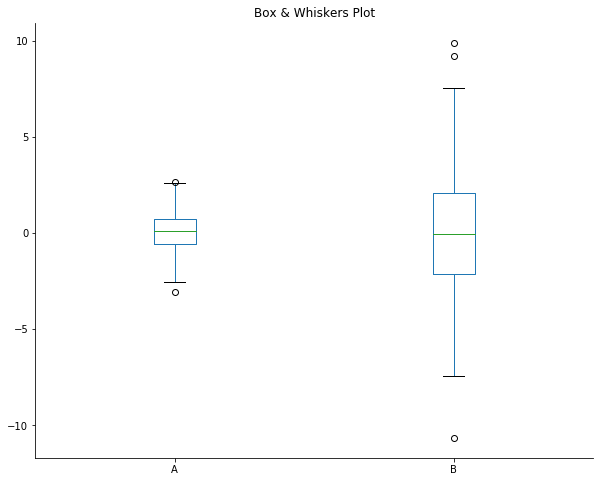

In [10]:
import matplotlib.pyplot as plt
plt.figure(figsize=(10,8))
plt.rcParams['axes.spines.right'] = False
plt.rcParams['axes.spines.top'] = False
boxplot = dataframe.boxplot(column=['A', 'B'], grid = False)
plt.title("Box & Whiskers Plot")
plt.show()

From the Box & Whiskers Plot, we can say means of A and B are very close. And both have some outliers in both sides.

(b)

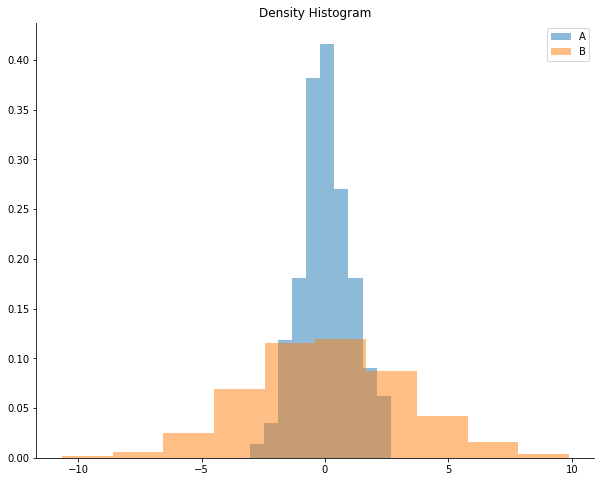

In [11]:
plt.figure(figsize=(10,8))
plt.hist(dataframe['A'], density = True, bins = 10, alpha = 0.5, label = "A")
plt.hist(dataframe['B'], density = True, bins = 10, alpha = 0.5, label = "B")
plt.legend(loc='upper right')
plt.title("Density Histogram")
plt.show()

Histograms also show identical means for A & B, even though the variance of B is much larger than the variance of A.

(c)

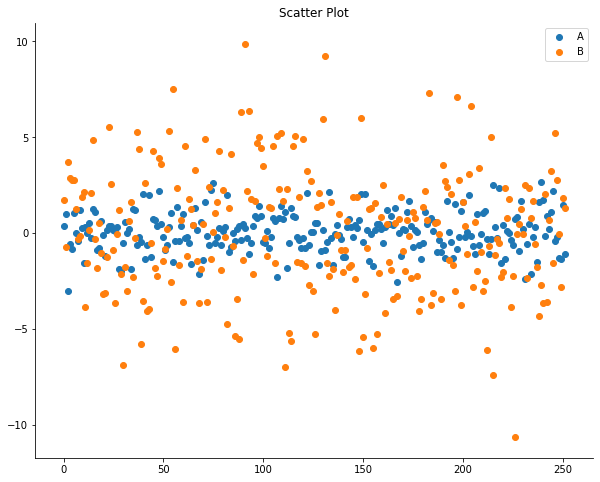

In [9]:
plt.figure(figsize=(10,8))
plt.scatter(dataframe['day'], dataframe['A'], label = "A")
plt.scatter(dataframe['day'], dataframe['B'], label = "B")
plt.legend(loc='upper right')
plt.title("Scatter Plot")
plt.show()

From the above scatter plot, it is clear that B diverges more widely than A.

Question 2:

We may predict the variances of A and B are not identical from Question 1. Using hypothesis test to test for a difference in variance of two funds daily performance, with the null hypothesis of identical variances.

2.1. Equal Variances Test

In [20]:
import scipy.stats as scs

scs.levene(dataframe['A'], dataframe['B'])

LeveneResult(statistic=197.34444225088367, pvalue=4.820586245059717e-38)

The test statistic is too high and p-value is much lower than 5% level of significance
-> Reject the null hypothesis
-> Two variances are not equal

2.2. Equal Means Test (with unequal variances): Null hypothesis of identical means

In [21]:
scs.ttest_ind(dataframe['A'], dataframe['B'], equal_var = False)

Ttest_indResult(statistic=0.04936213295020714, pvalue=0.9606633718850318)

The p-value is higher than 5% level of significance
-> Do not reject the null hypothesis
-> Two means are expected to be equal

Question 3:

Assume the price of fund A & B at the beginning of the first day is 100.

In [13]:
PA_start = 100
PB_start = 100
PA = [PA_start * (1+dataframe['A'][0] / 100)]
PB = [PB_start * (1+dataframe['B'][0] / 100)]
for i in list(range(1, len(dataframe['A']))):
    PA_i = PA[i-1] * (1+dataframe['A'][i] / 100)
    PB_i = PB[i-1] * (1+dataframe['B'][i] / 100)
    PA.append(PA_i)
    PB.append(PB_i)

dataframe["Price A"] = PA
dataframe["Price B"] = PB
print(dataframe)

RA = (PA[-1] - PA_start) / PA_start * 100
RB = (PB[-1] - PB_start) / PB_start * 100
print(f'Overall Rate of Return for Fund A: {round(RA,5)}%')
print(f'Overall Rate of Return for Fund B: {round(RB,5)}%')

     day         A          B     Price A     Price B
0      0  0.357060   1.709444  100.357060  101.709444
1      1  0.987462  -0.731701  101.348048  100.965235
2      2 -3.050105   3.699645   98.256825  104.700590
3      3 -0.562202   2.854270   97.704424  107.689027
4      4 -0.810810   2.743457   96.912227  110.643430
5      5  1.040020   2.765308   97.920133  113.703061
6      6  0.008324   1.270038   97.928285  115.147133
7      7 -0.431910  -0.312490   97.505322  114.787310
8      8  1.180086  -0.133642   98.655969  114.633906
9      9  0.272227   1.861233   98.924537  116.767510
10    10 -1.542825   2.120545   97.398304  119.243617
11    11  0.331102  -3.845495   97.720792  114.658109
12    12  0.011328  -1.586131   97.731862  112.839482
13    13  0.542955   0.167061   98.262502  113.027993
14    14 -0.272626   2.070969   97.994612  115.368768
15    15  1.246276   4.841413   99.215896  120.954246
16    16  1.078741  -0.318039  100.286178  120.569565
17    17 -0.862109  -1.84651

Question 4:

Through question 1-2, we see Fund A and Fund B have very close average daily rate of returns, which are positive and close to 0. Therefore, we may expect both funds have the same average yearly rate of returns, which equals daily rate multiply with 252.
However, question 3's results illustrate a totally different situation, where Fund A gained about 14% while Fund B lost 1% over the year.
The difference can be explained by the difference between arithmetic and geometric approach (which is used in question 3). Since the return rates is compounded over the year, geometric is the more appropriate approach.

In [24]:
import numpy as np
arith_mean_A = np.mean(dataframe["A"])
arith_mean_B = np.mean(dataframe["B"])
geo_mean_A = ((RA/100 +1)**(1/252)-1) * 100
geo_mean_B = ((RB/100 +1)**(1/252)-1) * 100
print(f'Arithmetic mean of daily rate of return for Fund A & Fund B: {round(arith_mean_A,5)}% & {round(arith_mean_B,5)}%')
print(f'Geometric mean of daily rate of return for Fund A & Fund B: {round(geo_mean_A,5)}% & {round(geo_mean_B,5)}%')

Arithmetic mean of daily rate of return for Fund A & Fund B: 0.05932% & 0.0487%
Geometric mean of daily rate of return for Fund A & Fund B: 0.05395% & -0.004%


Question 5:

5.1. Line Graph to see the difference in trend of Price A and Price B over time

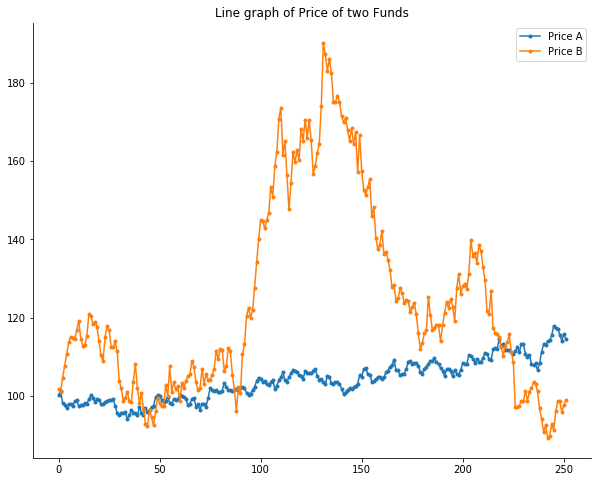

In [14]:
plt.figure(figsize=(10,8))
plt.plot(dataframe['Price A'], marker = ".", label = "Price A")
plt.plot(dataframe['Price B'], marker = ".", label = "Price B")
plt.legend(loc='upper right')
plt.title("Line graph of Price of two Funds")
plt.show()

5.2. Descriptive Statistics for the two funds' daily performance

In [31]:
des_stats_A = dataframe['A'].describe()
des_stats_B = dataframe['B'].describe()
print(f'Fund A:\n{des_stats_A}\n')
print(f'Fund B:\n{des_stats_B}')

Fund A:
count    252.000000
mean       0.059319
std        1.039089
min       -3.050105
25%       -0.593086
50%        0.079938
75%        0.708441
max        2.669866
Name: A, dtype: float64

Fund B:
count    252.000000
mean       0.048697
std        3.254206
min      -10.661036
25%       -2.144914
50%       -0.029047
75%        2.085253
max        9.894111
Name: B, dtype: float64


5.3. Correlation Map

Text(0.5, 1, 'Correlation Map')

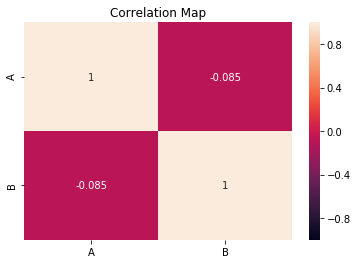

In [32]:
import seaborn as sb
corrmat = dataframe[['A', 'B']].corr()
sb.heatmap(corrmat, vmax = 1, vmin = -1, annot = True)
plt.title("Correlation Map")

corr(A,B) = -0.085 -> nearly zero -> Performances of Fund A and Fund B are not closely related.